In [61]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import pandas as pd
import openpyxl
import scipy.optimize

from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2

# Histéresis magnética

In [62]:
def Error_relativo(X_real,X_exp):
    return (np.abs(X_exp - X_real)/X_real)

def presicion(d,v):
    p = (d/v)
    if p <= 0.1:
        return p,True
    else:
        return p,False
    
def exactitud(xr,xm,d):
    e = (np.abs(xr-xm))
    if e <= (2.5*d):
        return e/d,True
    else:
        return e/d,False

X = sym.Symbol('x',real=True)
Y = sym.Symbol('y',real=True)

In [63]:
c = 299798458*1e09 #nm/s
c_ = 299798458 #m/s
me = 0.51099895*1e06/(c**2) #eV/c**2
me_ = 0.51099895*1e06/(c_**2) #eV/c**2
mp = 938.27208816*1e06/(c**2) #eV/c**2
mn = 939.56542052*1e06/(c**2) #eV/c**2
h = 4.136667696*1e-15 #eV*s
h_barra = 6.582119569*1e-16 #eV*s
e_0 = 55.26349406*1e-03 #e**2/(cV*nm)
e = 1 #e
a_0 = 0.0529177210903 #nm
Ry = 13.605693122994 #eV
Miu_B = 5.7883818066*1e-05 #eV/T

# Datos


In [64]:
wb = openpyxl.load_workbook(r"C:\Users\ASUS\OneDrive\Uniandes\Física\Física Moderna\Laboratorio-Moderna-GitHub\Histéresis Magnética\DatosHM.xlsx")
datos = pd.read_excel(io = r"C:\Users\ASUS\OneDrive\Uniandes\Física\Física Moderna\Laboratorio-Moderna-GitHub\Histéresis Magnética\DatosHM.xlsx", header=0,sheet_name='Hoja1',names=None,index_col=None,usecols='A:Q',skiprows=1,engine='openpyxl')
print(datos.head())

   I_A1 / A  &F / Vs  Unnamed: 2  I_A1 / A.1  &F / Vs.1  Unnamed: 5  \
0     0.001     0.00         NaN       0.002       0.00         NaN   
1     0.004     0.00         NaN       0.006       0.00         NaN   
2     0.005     0.00         NaN       0.015       0.00         NaN   
3     0.009    -0.01         NaN       0.030      -0.01         NaN   
4     0.013    -0.01         NaN       0.040      -0.01         NaN   

   I_A1 / A.2  &F / Vs.2  Unnamed: 8  I_A1 / A.3  &F / Vs.3  Unnamed: 11  \
0       0.169       0.00         NaN       0.002       0.00          NaN   
1       0.170       0.00         NaN       0.034       0.00          NaN   
2       0.140      -0.03         NaN       0.044      -0.01          NaN   
3       0.170      -0.08         NaN       0.091      -0.04          NaN   
4       0.193      -0.13         NaN       0.144      -0.09          NaN   

   I_A1 / A.4  &F / Vs.4  Unnamed: 14  I_A1 / A.5  &F / Vs.5  
0       0.010       0.00          NaN       0.170    

In [65]:
datos_ = datos.values
datos_np = np.float64(np.transpose(datos_))
I_1 = datos_np[0]
F_1 = datos_np[1]
I_2 = datos_np[3]
F_2 = datos_np[4]
I_3 = datos_np[6]
F_3 = datos_np[7]
I_4 = datos_np[9]
F_4 = datos_np[10]
I_5 = datos_np[12]
F_5 = datos_np[13]
I_6 = datos_np[15]
F_6 = datos_np[16]

N = 500
A = 0.001764 #m^2
L = 0.11 #m

B_1 = F_1/(N*A)
H_1 = (N*I_1)/L
B_2 = F_2/(N*A)
H_2 = (N*I_2)/L
B_3 = F_3/(N*A)
H_3 = (N*I_3)/L
B_4 = F_4/(N*A)
H_4 = (N*I_4)/L
B_5 = F_5/(N*A)
H_5 = (N*I_5)/L
B_6 = F_6/(N*A)
H_6 = (N*I_6)/L

Text(0.5, 1.0, 'sierra: 2V, 0.1Hz')

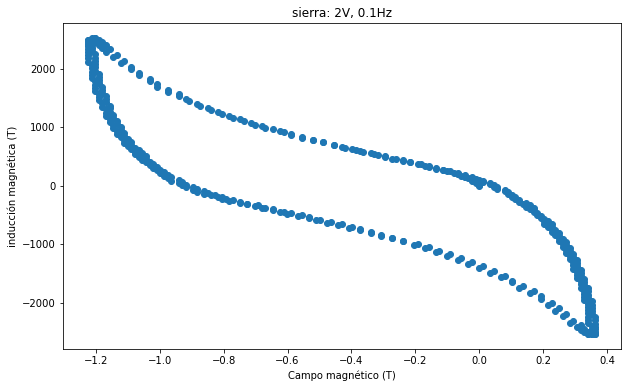

In [66]:
plt.figure(figsize=(10,6))
plt.scatter(B_1,H_1)
plt.ylabel('inducción magnética (T)')
plt.xlabel('Campo magnético (T)')
plt.title('sierra: 2V, 0.1Hz')

Text(0.5, 1.0, 'sinosoidal: 2V, 0.1Hz')

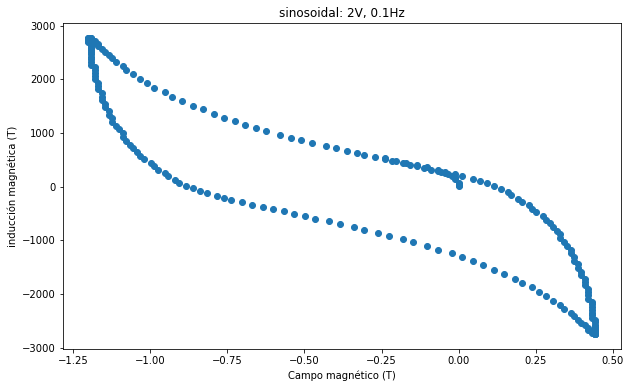

In [67]:
plt.figure(figsize=(10,6))
plt.scatter(B_2,H_2)
plt.ylabel('inducción magnética (T)')
plt.xlabel('Campo magnético (T)')
plt.title('sinosoidal: 2V, 0.1Hz')

Text(0.5, 1.0, 'cuadrada: 2V, 0.1 Hz')

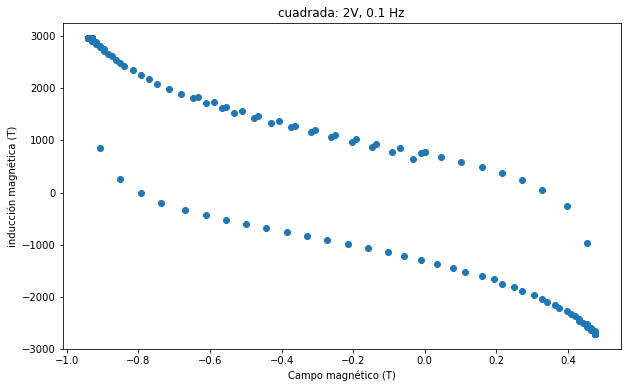

In [68]:
plt.figure(figsize=(10,6))
plt.scatter(B_3,H_3)
plt.ylabel('inducción magnética (T)')
plt.xlabel('Campo magnético (T)')
plt.title('cuadrada: 2V, 0.1 Hz')

Text(0.5, 1.0, 'sierra: 2V, 1Hz')

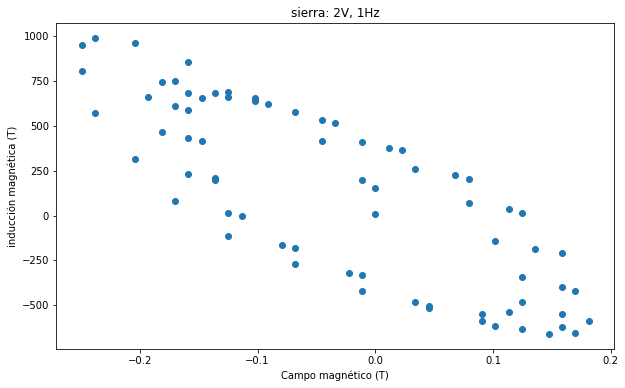

In [69]:
plt.figure(figsize=(10,6))
plt.scatter(B_4,H_4)
plt.ylabel('inducción magnética (T)')
plt.xlabel('Campo magnético (T)')
plt.title('sierra: 2V, 1Hz')

Text(0.5, 1.0, 'sinosoidal: 2V, 1Hz')

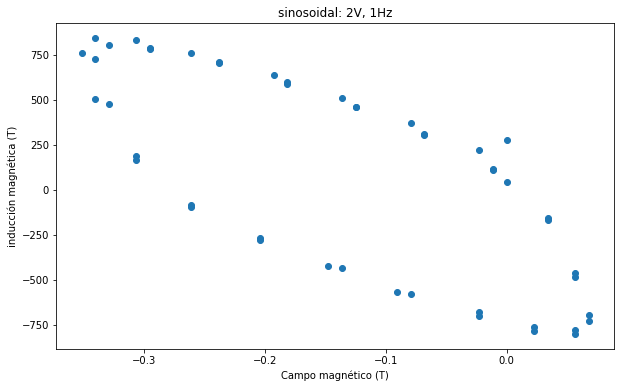

In [70]:
plt.figure(figsize=(10,6))
plt.scatter(B_5,H_5)
plt.ylabel('inducción magnética (T)')
plt.xlabel('Campo magnético (T)')
plt.title('sinosoidal: 2V, 1Hz')

Text(0.5, 1.0, 'cuadrada: 2V, 1 Hz')

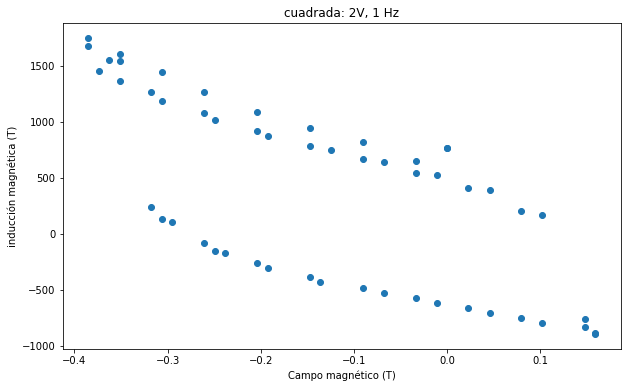

In [71]:
plt.figure(figsize=(10,6))
plt.scatter(B_6,H_6)
plt.ylabel('inducción magnética (T)')
plt.xlabel('Campo magnético (T)')
plt.title('cuadrada: 2V, 1 Hz')